In [1]:
import os
os.chdir(r'C:\Machine_learning_datafiles')

#importing necessary modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dir = os.listdir('./sendy_logistics')

In [356]:
train =pd.read_csv('./sendy_logistics/train_modified.csv')
test = pd.read_csv('./sendy_logistics/test_modified.csv')
rider = pd.read_csv('./sendy_logistics/Riders.csv')

In [5]:
pd.set_option('display.max_columns', 5000, 'display.max_rows', 120)
plt.rcParams['figure.figsize'] =[8,5]

In [7]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'hr_of_day', 'pickup_min',
       'Destination_city', 'Pickup_city', 'hourly_travel_time'],
      dtype='object')

   ### Variable Definitions

1. Order No- Unique number identifying the order
2. User id = Unique number identifying the customer on a platform
3. Vehicle type- means of transport. For this case it is bike
4. Platform type- Platform used to place the order
5. Personal/business - Customer type
6. Placement- Day of Month 1-31
7. Placement weekday- 1 for Monday
8. Placement time- Time of the day the order was placed
9. Confirmation- Day of Month 1-31
10. Confirmation-Weekday 1 for Mon
11. Confirmation -Time- Time of day the order was confirmed by a rider
12. Arrival at Pickup-Day of Month 1-31
13. Arrival at Pickup- Weekday 1 for Monday
14. Arrival at Pickup-Time - Time of day the rider arrived at the location to pick up the order- as marked by the rider through the Sendy application
15. Pickup-Day of Month- 1-31
16. Pickup- Weekday 1 for monday
17. Pickup-Time - Time of day rhe rider picked up the order- as marked by the rider through the Sendy application
<b>
18. Arrival at Delivery- Day of Month- 1-31
19. Arrival at Delivery- Weekday - 1 for Monday
20. Arrival at Delivery Time- Time of day the rider picked up the order- as marked by the rider through the Sendy application
    <p>(All Absent in the test data)</p>
</b>
21. Distance covered (Km)- The distance from pickup to Destination
22. Temperature- Temperature at the time of order placement in degree Celsius (measured every 3 hours)
23. Precipitation in Millimeters- Precipitation at the time of order placement (measured every three hours)
24. Pickup latitude and Longitude- Latitude and Longitude of pick up location
25. Destination latitude and Longitude- Latitude and Longitude of Delivery location
26. Rider ID- ID of the rider who accepted the order
27. Time from pickup to Arrival- Time in seconds btw Pickup and Arrival at Destination 

## Rider Metrics
1. Rider Id- Unique number identifying the rider (same as in order details)
2. No of orders- Number of orders the rider has delivered
3. Age- Number of days since the rider delivered the first order
4. Average rating- Average rating of the rider
5. No of Ratings- Number of ratings the rider has received. Rating an order is optional for the customer

In [6]:
original_train_vars = train.columns.tolist()
original_test_vars = test.columns.tolist()

len(original_train_vars), len(original_test_vars)

(34, 30)

In [8]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [9]:
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [357]:
train_columns = [
    'order_no', 'user_id',' vehicle_type', 'platform_type','personal/business', 'placement_day_of_month',\
    'placement_weekday', 'placement_time', 'confirmation_day_of_month','confirmation_weekday','confirmation_time',\
    'pickup_arrival_day_of_month', 'pickup_arrival_weekday','pickup_arrival_time', 'pickup_day_of_month', \
    'pickup_weekday','pickup_time', 'delivery_day_of_month','delivery_arrival_weekday',\
    'delivery_time','distance_in_km', 'temperature','precipitation_in_mm','pickup_latitude', 'pickup_longitude',\
    'destination_latitude','destination_longitude','rider_id','pickup_to_arrival_time','pickup_hr', 'pickup_min',\
    'Destination_city', 'Pickup_city', 'hourly_travel_time'
]

In [358]:
test_columns = [
    'order_no', 'user_id',' vehicle_type', 'platform_type','personal/business', 'placement_day_of_month',\
    'placement_weekday', 'placement_time', 'confirmation_day_of_month','confirmation_weekday','confirmation_time',\
    'pickup_arrival_day_of_month', 'pickup_arrival_weekday','pickup_arrival_time', 'pickup_day_of_month', \
    'pickup_weekday','pickup_time','distance_in_km', 'temperature','precipitation_in_mm','pickup_latitude', \
    'pickup_longitude','destination_latitude','destination_longitude','rider_id', 'pickup_hr', 'pickup_min',\
    'Destination_city', 'Pickup_city', 'hourly_travel_time'
]

In [359]:
train.columns =train_columns
test.columns= test_columns

In [53]:
print('The training data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The training data has 21201 rows and 34 columns
The test data has 7068 rows and 30 columns


In [14]:
print('Variables not in the test data set but in the train dataset are %s in number.' \
      %len((set(train_columns)).difference(set(test_columns))))

Variables not in the test data set but in the train dataset are 4 in number.


In [15]:
for dataset in [train, test]:
    print('Precipitation in mm variable has %.0f%% fraction of null values.' 
          %(dataset.precipitation_in_mm.isnull().sum()/dataset.precipitation_in_mm.size * 100))
    print('Temperature variable has %.0f%% null values.' 
          %(dataset.temperature.isnull().sum()/dataset.temperature.size *100))
    print()

Precipitation in mm variable has 97% fraction of null values.
Temperature variable has 21% null values.

Precipitation in mm variable has 97% fraction of null values.
Temperature variable has 20% null values.



We will be dropping the precipitation_in_mm column because it has about 97% null values

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 34 columns):
order_no                       21201 non-null object
user_id                        21201 non-null object
 vehicle_type                  21201 non-null object
platform_type                  21201 non-null int64
personal/business              21201 non-null object
placement_day_of_month         21201 non-null int64
placement_weekday              21201 non-null int64
placement_time                 21201 non-null object
confirmation_day_of_month      21201 non-null int64
confirmation_weekday           21201 non-null int64
confirmation_time              21201 non-null object
pickup_arrival_day_of_month    21201 non-null int64
pickup_arrival_weekday         21201 non-null int64
pickup_arrival_time            21201 non-null object
pickup_day_of_month            21201 non-null int64
pickup_weekday                 21201 non-null int64
pickup_time                    21201 non-null object

In [17]:
train.describe()

,platform_type,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,pickup_arrival_day_of_month,pickup_arrival_weekday,pickup_day_of_month,pickup_weekday,delivery_day_of_month,delivery_arrival_weekday,distance_in_km,temperature,precipitation_in_mm,pickup_latitude,pickup_longitude,destination_latitude,destination_longitude,pickup_to_arrival_time,pickup_hr,pickup_min,hourly_travel_time
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,19046.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,12.873214,801.787746,1409.392411
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,2.551666,152.192497,755.627038
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.000000,49.000000,106.647143
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,11.000000,678.000000,780.024286
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,13.000000,797.000000,1339.175000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,15.000000,923.000000,1938.214286
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,23.000000,1393.000000,4698.567143


In [360]:
def convert_to_time(data, columns=list):
    """Function converting time objects into time dtypes
    """
    for col in columns:
        data[col] = data[col].apply(lambda x: pd.to_datetime(x))
    return data

def weekday_conversion(weekday):
    if weekday == 1: return 'Mon'
    elif weekday == 2: return 'Tues'
    elif weekday == 3: return 'Wed'
    elif weekday == 4: return 'Thurs'
    elif weekday == 5: return 'Fri'
    elif weekday == 6: return 'Sat'
    elif weekday == 7: return 'Sun'

def time_of_day(time):
    if time.hour < 5: return 'EM'
    elif 5 <= time.hour < 12: return 'Mo'
    elif 12 <= time.hour < 17: return 'Af'
    elif 17 <= time.hour < 21: return 'Ev'
    elif 21 <= time.hour < 24: return 'Ni'

In [361]:
%%time
#converting both train and test data
train = convert_to_time(train, columns=['placement_time', 'confirmation_time', 'pickup_arrival_time', \
                        'pickup_time', 'delivery_time'])

test = convert_to_time(test, columns=['placement_time', 'confirmation_time', \
                                      'pickup_arrival_time', 'pickup_time'])

print('Total number of riders working for sendy logistics are %s.'\
      %len(set(train.rider_id.unique().tolist()).union(set(test.rider_id.unique().tolist()))))


Total number of riders working for sendy logistics are 952.
Wall time: 35.9 s


In [362]:
#converting weekday numbers to names
#training data
for weekday in ['placement_weekday', 'confirmation_weekday','delivery_arrival_weekday', 
                'pickup_arrival_weekday', 'pickup_weekday']:
    train[weekday] = train[weekday].apply(weekday_conversion)

#test data
for weekday in ['placement_weekday', 'confirmation_weekday', 'pickup_arrival_weekday', 'pickup_weekday']:
    test[weekday] = test[weekday].apply(weekday_conversion)

In [363]:
#coverting time to time of day
for time in ['pickup_time', 'placement_time']:
    train[time+'_of_day'] = train[time].apply(time_of_day)

#coverting time to time of day
for time in ['pickup_time','placement_time']:
    test[time+'_of_day'] = test[time].apply(time_of_day)

In [364]:
train.hourly_travel_time.fillna(-999, inplace=True)
test.hourly_travel_time.fillna(-999, inplace=True)

In [365]:
#this checks the difference btw the time the rider came to pickup the orderand the time he left to deliver the order
for dataset in [train,test]:
    dataset['rider_delay_time_in_mins'] = round((dataset.pickup_time - dataset.pickup_arrival_time).dt.seconds / 60,0)
    dataset['placement_to_pickup_time_min'] = round((dataset.pickup_time - dataset.confirmation_time).dt.seconds/60,0)
    dataset['placement_to_confirmation_time_min'] = round((dataset.confirmation_time - dataset.placement_time).dt.seconds/60,0)
    dataset['confirmation_to_pickup_time_min'] = round((dataset.pickup_time - dataset.confirmation_time).dt.seconds/60,0)

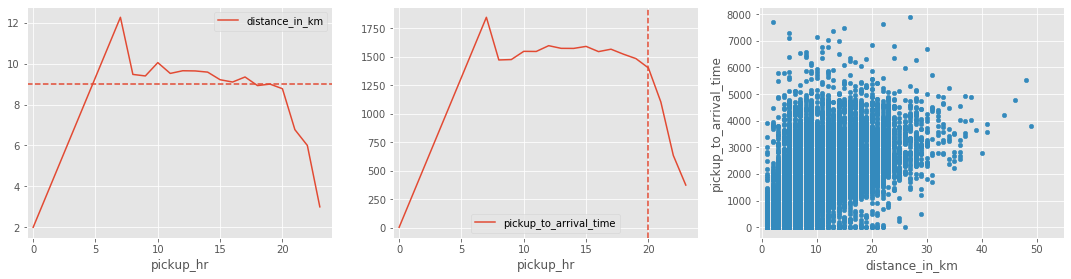

In [60]:
fig,ax= plt.subplots(1,3, figsize=[15,4])
train[['pickup_hr', 'distance_in_km','pickup_to_arrival_time']
     ].groupby(['pickup_hr']).mean().reset_index().plot(x='pickup_hr', y='distance_in_km', ax=ax[0])
ax[0].set_xlim(-0.5,24)
ax[0].axhline(9, ls='--')

train[['pickup_hr', 'distance_in_km','pickup_to_arrival_time']
     ].groupby(['pickup_hr']).mean().reset_index().plot(x='pickup_hr', y='pickup_to_arrival_time', ax=ax[1])

ax[1].set_xlim(-0.5,24)
ax[1].axvline(20, ls='--')

train[['distance_in_km','pickup_to_arrival_time']].plot(kind='scatter',y='pickup_to_arrival_time', x='distance_in_km', ax=ax[2])
ax[2].set_xlim(-.5,55)
plt.tight_layout(pad=1.15);

In [366]:
pickup_18_dist_9_list =[]
for (pickup_hr, distance) in train[['pickup_hr','distance_in_km']].values:
    if pickup_hr < 18 and distance < 9:
        pickup_18_dist_9_list.append(1)
    else:
        pickup_18_dist_9_list.append(0)
train['pickup_hr_18_dist_9'] = pickup_18_dist_9_list

In [367]:
pickup_18_dist_9_list =[]
for (pickup_hr, distance) in test[['pickup_hr','distance_in_km']].values:
    if pickup_hr < 18 and distance < 9:
        pickup_18_dist_9_list.append(1)
    else:
        pickup_18_dist_9_list.append(0)
test['pickup_hr_18_dist_9'] = pickup_18_dist_9_list

In [368]:
for data in [train, test]:
    data['distance_greater_11'] = (data.distance_in_km > 11).astype(int)

In [369]:
#average speed
for dataset in [train,test]:
    dataset['hourly_av_speed_in_ms'] = dataset.distance_in_km * 1000 / dataset.hourly_travel_time

In [370]:
#average speed for each rider for each location he goes to
rider_av_speed = train.groupby(['rider_id']).agg({'hourly_av_speed_in_ms':'mean'})

rider_av_speed.columns = ['rider_mean_hourly_speed_ms']

train = pd.merge(train, rider_av_speed, on='rider_id', how='left')

In [371]:
#average speed for each rider for each location he goes to
rider_av_speed = test.groupby(['rider_id']).agg({'hourly_av_speed_in_ms':'mean'})

rider_av_speed.columns = ['rider_mean_hourly_speed_ms']

test = pd.merge(test, rider_av_speed, on='rider_id', how='left')

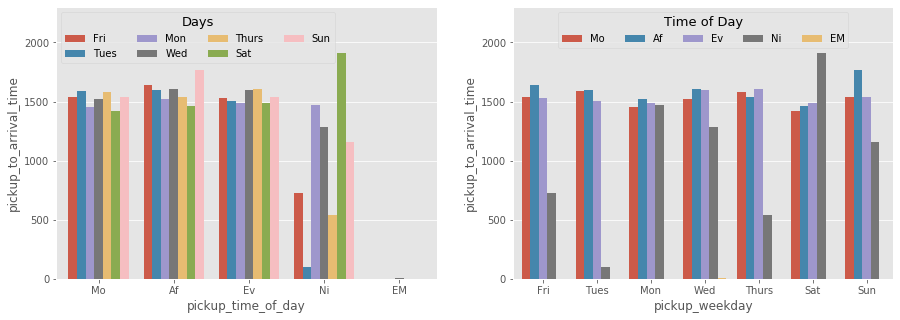

In [68]:
fig,ax=plt.subplots(1,2,figsize=[15,5])
sns.barplot('pickup_time_of_day','pickup_to_arrival_time', hue='pickup_weekday',data=train,ci=None, ax=ax[0])
sns.barplot('pickup_weekday','pickup_to_arrival_time', hue='pickup_time_of_day',data=train,ci=None, ax=ax[1])
ax[0].set(ylim=[0,2300], xlim=(-0.56,4.5))
ax[1].set(ylim=[0,2300], xlim=(-0.56,6.5))
ax[0].legend(ncol=4, loc='best', title='Days', title_fontsize=13)
ax[1].legend(ncol=7, loc='upper center', title='Time of Day', title_fontsize=13);

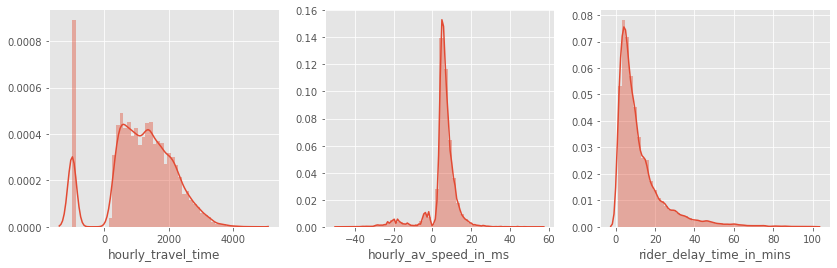

In [69]:
fig,ax = plt.subplots(1,3, figsize=[14,4])
sns.distplot(train.hourly_travel_time, ax=ax[0])
sns.distplot(train.hourly_av_speed_in_ms, ax=ax[1])
sns.distplot(train.rider_delay_time_in_mins, ax=ax[2]);

In [70]:
train.isnull().sum()

order_no                                 0
user_id                                  0
 vehicle_type                            0
platform_type                            0
personal/business                        0
placement_day_of_month                   0
placement_weekday                        0
placement_time                           0
confirmation_day_of_month                0
confirmation_weekday                     0
confirmation_time                        0
pickup_arrival_day_of_month              0
pickup_arrival_weekday                   0
pickup_arrival_time                      0
pickup_day_of_month                      0
pickup_weekday                           0
pickup_time                              0
delivery_day_of_month                    0
delivery_arrival_weekday                 0
delivery_time                            0
distance_in_km                           0
temperature                           4366
precipitation_in_mm                  20649
pickup_lati

In [372]:
def temperature_na_replace(data):  
    temps = []
    temp_ = data.groupby('placement_time_of_day').agg({'temperature':'mean'}).reset_index()
    temp_dict = dict(temp_.values)
    
    for daytime, temp in data[['placement_time_of_day','temperature']].values:
        if daytime == 'EM' and np.isnan(temp)==True:
            temps.append(round(temp_dict['EM'],1))
        elif daytime == 'Af' and np.isnan(temp)== True:
            temps.append(round(temp_dict['Af'],1))
        elif daytime == 'Ev' and np.isnan(temp) == True:
            temps.append(round(temp_dict['Ev'],1))
        elif daytime == 'Mo' and np.isnan(temp) == True:
            temps.append(round(temp_dict['Mo'], 1))
        elif daytime == 'Ni' and np.isnan(temp) == True:
            temps.append(round(temp_dict['Ni'], 1))
        else:
            temps.append(temp)
    data['temperature'] = temps
    return data

In [373]:
for data in [train,test]:
    data = temperature_na_replace(data)

In [374]:
for dataset in [train, test]:
    dataset['pickup_dest_lat_diff_10'] = abs(dataset['pickup_latitude'] - dataset['destination_latitude']) * 10
    dataset['pickup_dest_long_diff_10'] = abs(dataset['pickup_longitude'] - dataset['destination_longitude']) * 10

In [179]:
train.columns

Index(['order_no', 'user_id', ' vehicle_type', 'platform_type',
       'personal/business', 'placement_day_of_month', 'placement_weekday',
       'placement_time', 'confirmation_day_of_month', 'confirmation_weekday',
       'confirmation_time', 'pickup_arrival_day_of_month',
       'pickup_arrival_weekday', 'pickup_arrival_time', 'pickup_day_of_month',
       'pickup_weekday', 'pickup_time', 'delivery_day_of_month',
       'delivery_arrival_weekday', 'delivery_time', 'distance_in_km',
       'temperature', 'precipitation_in_mm', 'pickup_latitude',
       'pickup_longitude', 'destination_latitude', 'destination_longitude',
       'rider_id', 'pickup_to_arrival_time', 'pickup_hr', 'pickup_min',
       'Destination_city', 'Pickup_city', 'hourly_travel_time',
       'pickup_time_of_day', 'placement_time_of_day',
       'rider_delay_time_in_mins', 'placement_to_pickup_time_min',
       'placement_to_cofirmation_time_min', 'pickup_hr_18_dist_9',
       'distance_greater_11', 'hourly_av_speed

In [375]:
train_df = train[['pickup_hr', 'distance_in_km', 
                  'temperature', 'pickup_latitude', 'pickup_longitude', 'destination_latitude', 'destination_longitude', 
                  'pickup_dest_lat_diff_10', 'pickup_dest_long_diff_10', 'pickup_time_of_day','pickup_weekday',
                  'hourly_av_speed_in_ms', 'rider_mean_hourly_speed_ms','rider_delay_time_in_mins', 
                  'placement_to_pickup_time_min', 'placement_to_confirmation_time_min', 'confirmation_to_pickup_time_min',
                  'pickup_hr_18_dist_9', 'distance_greater_11','pickup_to_arrival_time']]

test_df = test[['pickup_hr', 'distance_in_km','temperature', 'pickup_latitude', 'pickup_longitude', 
                'destination_latitude', 'destination_longitude', 'pickup_dest_lat_diff_10', 'pickup_dest_long_diff_10', 
                'pickup_time_of_day','pickup_weekday', 'hourly_av_speed_in_ms','rider_mean_hourly_speed_ms',
                'rider_delay_time_in_mins', 'placement_to_pickup_time_min', 'placement_to_confirmation_time_min', 
                'confirmation_to_pickup_time_min','pickup_hr_18_dist_9', 'distance_greater_11']]

In [376]:
for data in [train_df, test_df]:
    time_of_day_map = dict(data.pickup_time_of_day.value_counts().transform(lambda x: x/x.sum()))
    data['pickup_time_of_day'] = data.pickup_time_of_day.map(time_of_day_map)

In [377]:
for data in [train_df, test_df]:
    weekday_map = dict(data.pickup_weekday.value_counts().transform(lambda x: x/x.sum()))
    data['pickup_weekday'] = data.pickup_weekday.map(weekday_map)

In [378]:
corr =train_df.corr()

In [379]:
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [380]:
corr

,pickup_hr,distance_in_km,temperature,pickup_latitude,pickup_longitude,destination_latitude,destination_longitude,pickup_dest_lat_diff_10,pickup_dest_long_diff_10,pickup_time_of_day,pickup_weekday,hourly_av_speed_in_ms,rider_mean_hourly_speed_ms,rider_delay_time_in_mins,placement_to_pickup_time_min,placement_to_confirmation_time_min,confirmation_to_pickup_time_min,pickup_hr_18_dist_9,distance_greater_11,pickup_to_arrival_time
pickup_hr,1.000000,-0.036373,0.422780,0.039430,-0.011040,0.018985,-0.002764,-0.032097,-0.020648,0.156231,0.034237,-0.053611,-0.030169,0.021603,0.044878,0.062035,0.044878,-0.027662,-0.023926,0.010314
distance_in_km,-0.036373,1.000000,-0.005331,-0.124338,0.178537,-0.079366,0.135397,0.724589,0.814407,-0.001606,-0.028271,-0.249968,-0.114072,0.103208,0.152856,-0.018394,0.152856,-0.756438,0.823154,0.580608
temperature,0.422780,-0.005331,1.000000,0.020441,0.009567,0.011425,0.025563,0.006680,0.002400,0.337384,0.042336,-0.033666,-0.015444,0.034322,0.009139,0.003066,0.009139,0.027137,0.004497,0.007258
pickup_latitude,0.039430,-0.124338,0.020441,1.000000,-0.147629,0.114975,0.051399,-0.048701,-0.131114,-0.007374,0.016380,0.037834,0.045786,-0.120896,-0.123886,-0.017253,-0.123886,0.100933,-0.092499,-0.053823
pickup_longitude,-0.011040,0.178537,0.009567,-0.147629,1.000000,0.014992,0.082803,0.125789,0.143979,0.019638,-0.022262,-0.081763,-0.057918,0.167870,0.190317,0.033058,0.190317,-0.134472,0.174145,0.060285
destination_latitude,0.018985,-0.079366,0.011425,0.114975,0.014992,1.000000,0.046767,-0.017504,-0.139300,-0.003937,-0.018023,-0.063801,0.000459,-0.030231,-0.019648,-0.008562,-0.019648,0.063198,-0.091044,-0.061872
destination_longitude,-0.002764,0.135397,0.025563,0.051399,0.082803,0.046767,1.000000,0.191770,0.117612,0.028745,-0.013567,-0.087206,-0.022809,-0.015863,0.001818,0.018096,0.001818,-0.085125,0.135330,0.070425
pickup_dest_lat_diff_10,-0.032097,0.724589,0.006680,-0.048701,0.125789,-0.017504,0.191770,1.000000,0.371704,-0.002196,-0.007500,-0.375242,-0.128599,0.076531,0.103311,-0.006861,0.103311,-0.534017,0.556860,0.453923
pickup_dest_long_diff_10,-0.020648,0.814407,0.002400,-0.131114,0.143979,-0.139300,0.117612,0.371704,1.000000,0.008755,-0.020400,-0.173384,-0.086082,0.085471,0.119772,-0.012162,0.119772,-0.610704,0.698792,0.467943
pickup_time_of_day,0.156231,-0.001606,0.337384,-0.007374,0.019638,-0.003937,0.028745,-0.002196,0.008755,1.000000,0.033936,-0.005623,0.000542,0.004174,-0.003309,0.000115,-0.003309,0.084253,-0.000622,0.021967


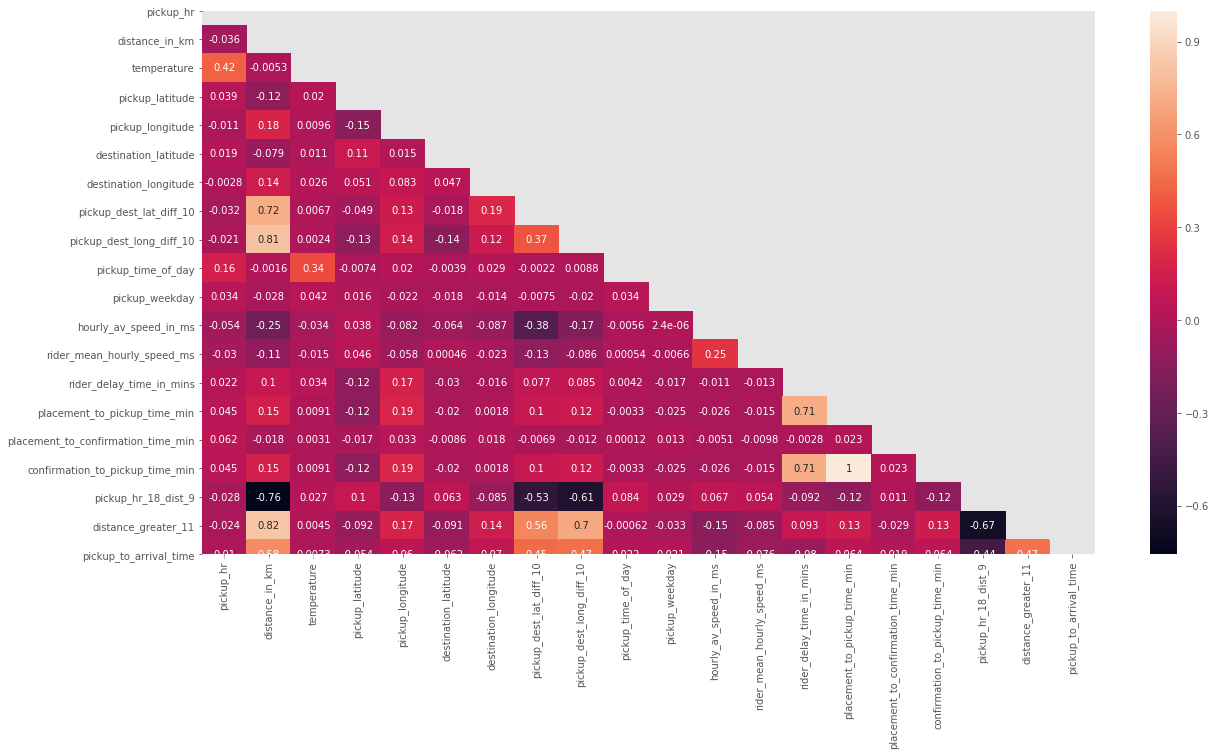

In [381]:
plt.figure(figsize=[20,10])
sns.heatmap(corr, annot=True, mask=mask);

In [382]:
features = train_df.drop('pickup_to_arrival_time', 1)
labels = train_df.pickup_to_arrival_time

In [383]:
predictors = features.columns.tolist()

In [352]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [180]:
from custom_metrics import mlfunctools
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

In [184]:
from sklearn.feature_selection import f_regression, SelectFromModel, SelectKBest
from sklearn.pipeline import Pipeline

In [384]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.30, random_state=945)

In [92]:
xgb = XGBRegressor(objective='reg:squarederror',max_depth=5, reg_lambda=3, random_state=32)
rf = RandomForestRegressor(max_depth=20, random_state=32 )
gb = GradientBoostingRegressor(max_depth=5, max_features='auto', random_state=32)
lgb= LGBMRegressor(importance_type='gain', max_depth=5, reg_lambda=3, random_state=32)
cat = CatBoostRegressor(silent=True, max_depth=5, l2_leaf_reg=3, random_state=32)

In [93]:
for estimator in [gb, lgb, xgb, cat, rf]:
    cvs = cross_val_score(estimator, features, labels, cv=5, scoring='neg_mean_squared_error')
    cvs_mean = np.sqrt(-cvs.mean())
    print(estimator.__class__.__name__,'RMSE: {}'.format(cvs_mean))

GradientBoostingRegressor RMSE: 754.6126371995838
LGBMRegressor RMSE: 752.1068412661295
XGBRegressor RMSE: 752.3815702890656
CatBoostRegressor RMSE: 749.6469490349413
RandomForestRegressor RMSE: 808.5861902348666


In [110]:
cat.get_params()

{'l2_leaf_reg': 3,
 'loss_function': 'RMSE',
 'silent': True,
 'max_depth': 5,
 'random_state': 32}

In [98]:
cat.best_score_, cat.best_iteration_

({'learn': {'RMSE': 709.8533395932786},
  'validation': {'RMSE': 746.6419980973706}},
 729)

In [149]:
params = {
    'max_depth':[5],
    'l2_leaf_reg':[3],
    'learning_rate':[0.03],
#     'n_estimators':[1000],
    'bootstrap_type' :['Bernoulli'],
    'subsample':[0.85]
}

In [150]:
gcv= mlfunctools.grid_search(cat, X_train, y_train, cv=5, param_grid=params,scoring='neg_mean_squared_error')

In [151]:
gcv.best_params_, np.sqrt(-gcv.best_score_)

({'bootstrap_type': 'Bernoulli',
  'l2_leaf_reg': 3,
  'learning_rate': 0.03,
  'max_depth': 5,
  'subsample': 0.85},
 754.7664455717402)

In [152]:
np.sqrt(mlfunctools.mse(gcv.best_estimator_, X_val, y_val))

744.6370203639759

In [153]:
np.sqrt(-gcv.cv_results_['mean_test_score'])

array([755.82010973, 756.14893697, 754.76644557])

In [154]:
importance,predictor = zip(*sorted(zip(cat.feature_importances_,predictors)))

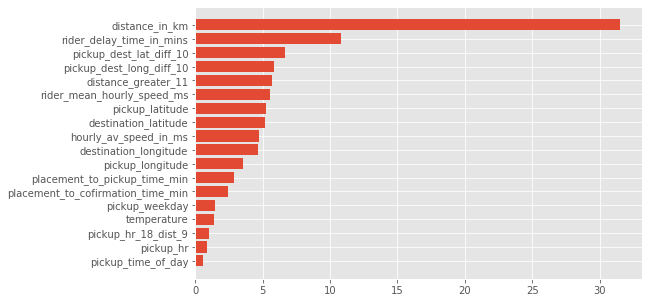

In [155]:
plt.barh(predictor, importance);

I tried different combinations of the columns and saw that when the temperture variable was used in the model, the RMSE increased, so I had to remove it.

In [385]:
cols_to_drop = ['temperature']

In [386]:
X_train_,X_val_, y_train_ ,y_val_= train_test_split(features.drop(cols_to_drop,1), labels, test_size=0.25, random_state=54)

In [387]:
fit= cat.fit(X_train_, y_train_, eval_set=[(X_val_,y_val_)])

In [389]:
cat.best_score_

{'learn': {'RMSE': 697.9459594643769},
 'validation': {'RMSE': 736.2251330708118}}

In [416]:
params = {'max_depth': [6],
          'l2_leaf_reg': [3],
           'learning_rate': [0.03],
          #  'bootstrap_type': ['Bernoulli'],
          #  'subsample': [0.6, 0.75, 0.85]
         }

In [417]:
gcv= mlfunctools.grid_search(cat, X_train_, y_train_, cv=5, param_grid=params,scoring='neg_mean_squared_error')

In [418]:
gcv.best_params_, np.sqrt(-gcv.best_score_)

({'l2_leaf_reg': 3, 'learning_rate': 0.03, 'max_depth': 6}, 754.5979914433217)

In [411]:
np.sqrt(-gcv.cv_results_['mean_test_score'])

array([754.59799144, 754.69162175, 761.39440211])

In [419]:
np.sqrt(mlfunctools.mse(gcv.best_estimator_, X_val_, y_val_))

735.4762782560009

In [423]:
X_test = test_df.drop(cols_to_drop ,1)

In [424]:
pred = gcv.best_estimator_.predict(X_test)

In [425]:
pred

array([1323.17327524, 1476.16683959, 1236.2471629 , ..., 1413.72026501,
       2445.08569913, 1858.58149708])

In [426]:
X_test_df = pd.DataFrame(test.order_no)

In [262]:
original_test_vars

['Order No',
 'User Id',
 'Vehicle Type',
 'Platform Type',
 'Personal or Business',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Placement - Time',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Confirmation - Time',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Arrival at Pickup - Time',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Pickup - Time',
 'Distance (KM)',
 'Temperature',
 'Precipitation in millimeters',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'Rider Id',
 'hr_of_day',
 'pickup_min',
 'Destination_city',
 'Pickup_city',
 'hourly_travel_time']

In [427]:
X_test_df['Time from Pickup to Arrival'] = pred

In [429]:
X_test_df.to_csv('./sendy_logistics/sendy_logistics.csv', index=False)